In [1]:
from google.colab import drive
drive.mount('/content/drive') #mount -> 구글드라이브에 드라이브폴더를 가져옴

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/ThoraricSurgery3.csv')

,1,2.88,2.16,1.1,0,0.1,0.2,1.2,1.3,3,0.3,0.4,0.5,1.4,0.6,60,0.7
0,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
1,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
2,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
3,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
4,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
465,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
466,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
467,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [6]:
data_set=np.loadtxt('/content/drive/MyDrive/멀티캠퍼스/data/ThoraricSurgery3.csv',delimiter=",") # 딥러닝 모델링시 array로 변환 후 작업진행 ->연산속도 때문

In [7]:
data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [8]:
data_set.shape

(470, 17)

In [9]:
X=data_set[:,0:16] # 독립변수
Y=data_set[:,16] # 종속변수 (target)

In [10]:
X
Y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [19]:
#딥러닝 모델 구조 설계(수동)
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.

In [28]:
model=Sequential()

In [29]:
#model의 input레이어 데이터 입력 차원 설정 -> input레이어 출력 차원 개수 지정(히든 레이어의 수)
model.add(Dense(units=32,input_dim=16,activation='relu'))
#32개로 출력된다가 의미하는 것 -> 데이터가 32개의 일반화된 특징으로 표현됨
model.add(Dense(8,activation='relu'))
#input_dim=input레이어의 입력차원 설정
#활성화 함수 보통 relu함수 0보다 작으면 0출력 양수이면 그대로 출력
#units =출력 차원의 개수(히든레이어 노드의 수)

In [30]:
model.add(Dense(1,activation='sigmoid')) # Dense의 첫번째 인수가 출력 차원갯수(units)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 817 (3.19 KB)
Trainable params: 817 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#딥러닝 모델= 깊은신경망(히든계층이 2개 이상)으로 학습된 모델의 가중치변수로 표현된 함수식


In [33]:
#모델 실행
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
hist=model.fit(X,Y,epochs=20,batch_size=16) #전체 데이터를 10번 학습 한번 읽을때 16개의 데이터씩 읽음.

Epoch 1/20
30/30 [==============================] - 1s 3ms/step - loss: 11.7223 - accuracy: 0.1489
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 3.6217 - accuracy: 0.1489
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.6362
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.8404
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.8447
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.8468
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.8447
Epoch 8/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.8511
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.8489
Epoch 10/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.8489
Epoch 11/20
30/30 

In [36]:
#하이퍼 파라미터(에포크,배치사이즈,등등)

# hist=model.fit(X, y, epochs=10, batch_size=20)

# 데이터 : 470건
# 1 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 진행
# 10 epoch : 470건의 데이터 전체에 대해 훈련(학습)이 10번 반복 진행
# batch_size : 1번의 훈련(학습)에 사용되는 데이터의 건수
# batch_size=20 : 1번의 훈련(학습)에 사용되는 데이터가 20건,
# 20건의 데이터에 대한 예측 결과와 실제 결과의 차이인 에러를 계산
# -> 에러를 줄이기 위해 역전파를 1번 수행하면서 가중치가 업데이트
# 따라서 1 epoch(470건)에는 batch가 총 23번 일어남(학습이 23번 이뤄짐)
# => 역전파가 23번 수행됨


In [37]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])
# 5시간 ? 몇점? -> 선형 회귀

In [38]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [39]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [40]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [41]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x): #pred_y=2.3 * x + 79
    return a * x + b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [42]:
predict(5)

90.5

In [43]:
import matplotlib.pyplot as plt

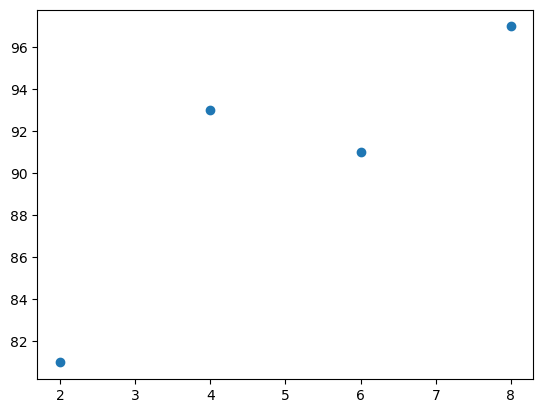

In [44]:
plt.scatter(x, y)

plt.show()

In [53]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0
#학습률을 정합니다.
lr = 0.01
#몇 번 반복될지를 설정합니다.
epochs = 2001

epoch=0, 기울기=9.2800, 절편=1.8100


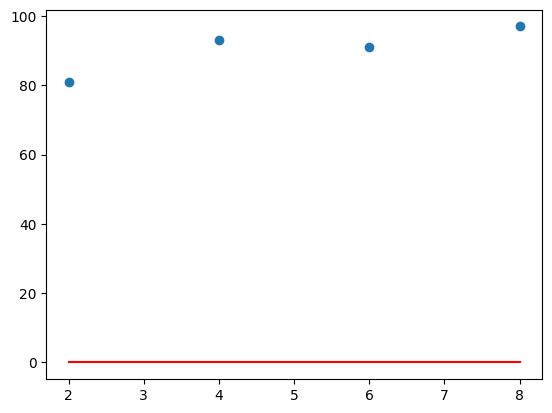

epoch=100, 기울기=11.5301, 절편=23.9186


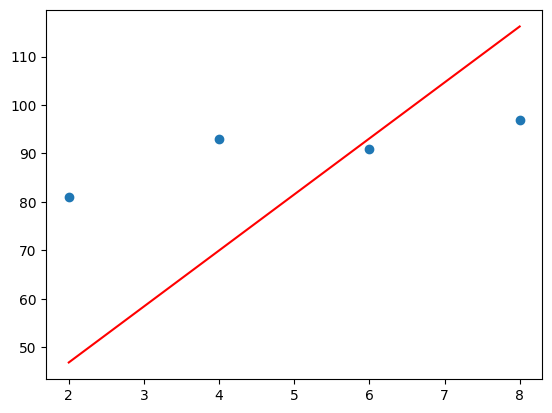

epoch=200, 기울기=8.9703, 절편=39.1944


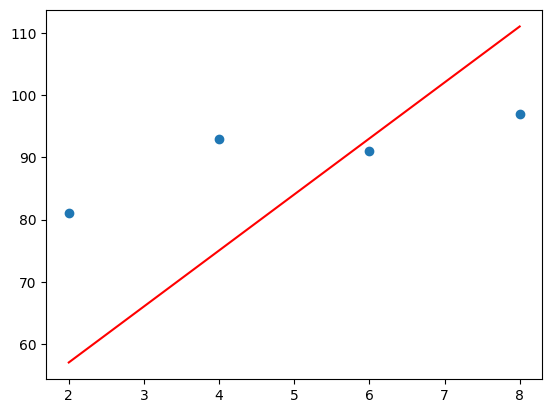

epoch=300, 기울기=7.1204, 절편=50.2337


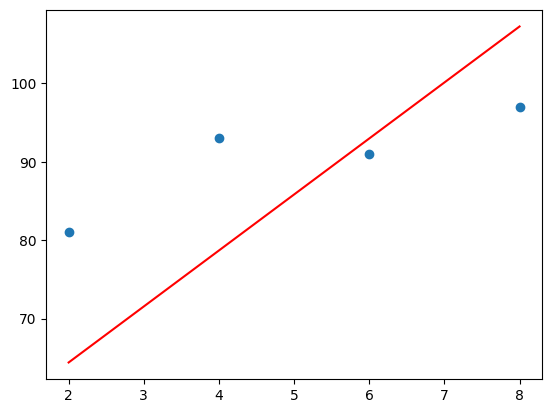

epoch=400, 기울기=5.7836, 절편=58.2115


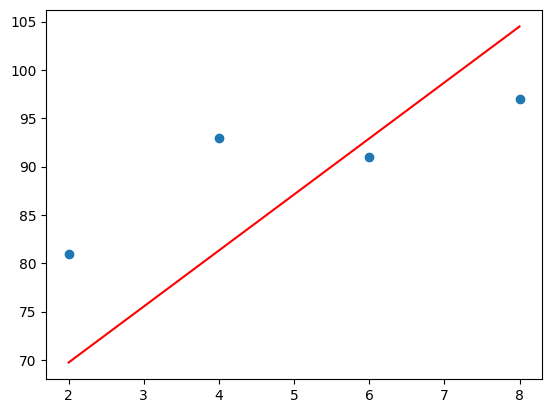

epoch=500, 기울기=4.8175, 절편=63.9768


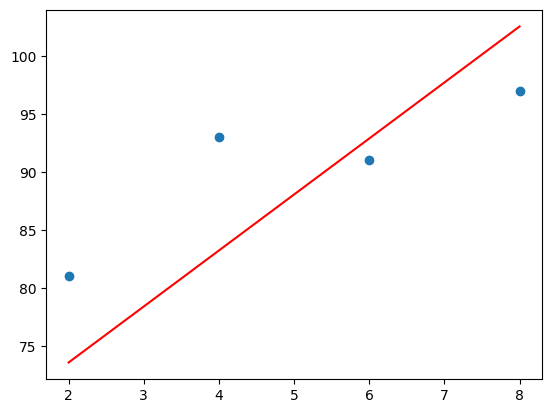

epoch=600, 기울기=4.1193, 절편=68.1432


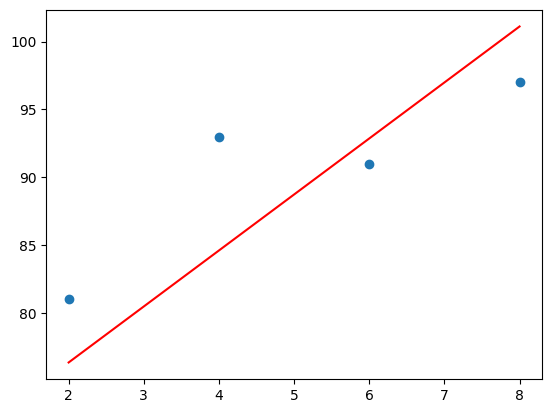

epoch=700, 기울기=3.6148, 절편=71.1541


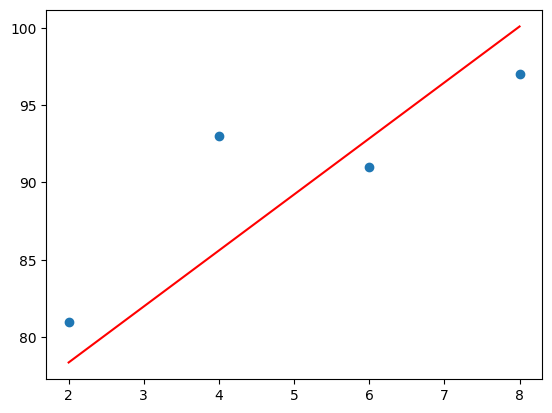

epoch=800, 기울기=3.2501, 절편=73.3300


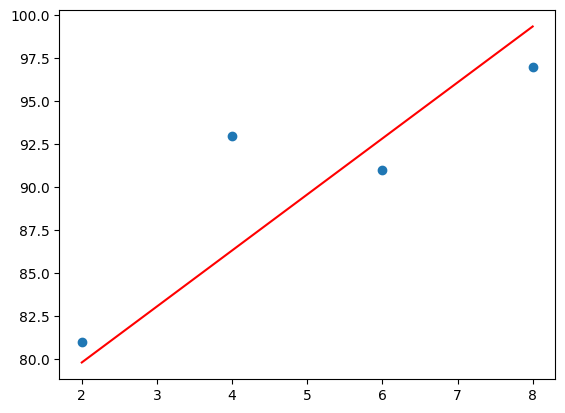

epoch=900, 기울기=2.9866, 절편=74.9025


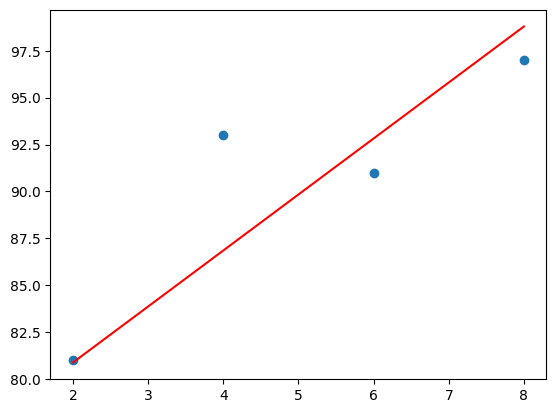

epoch=1000, 기울기=2.7962, 절편=76.0388


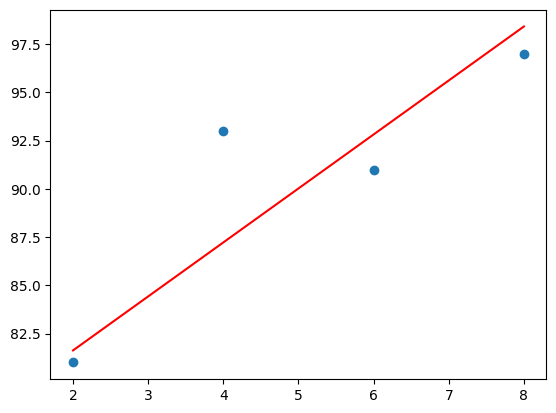

epoch=1100, 기울기=2.6586, 절편=76.8601


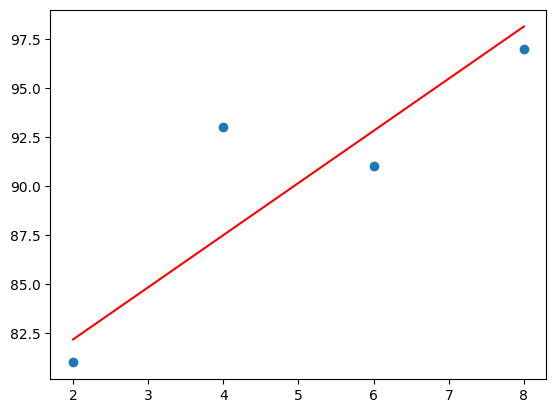

epoch=1200, 기울기=2.5591, 절편=77.4535


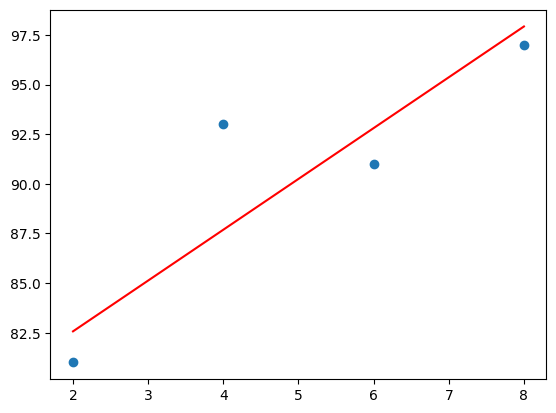

epoch=1300, 기울기=2.4873, 절편=77.8824


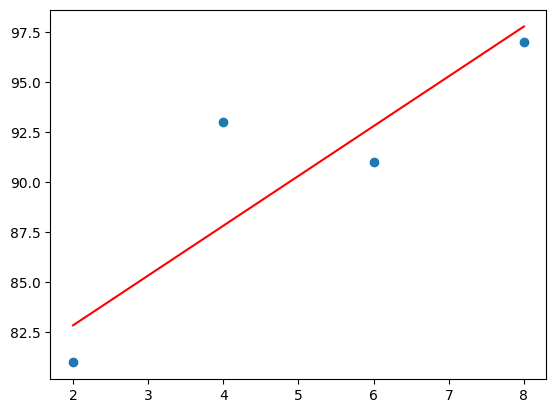

epoch=1400, 기울기=2.4353, 절편=78.1924


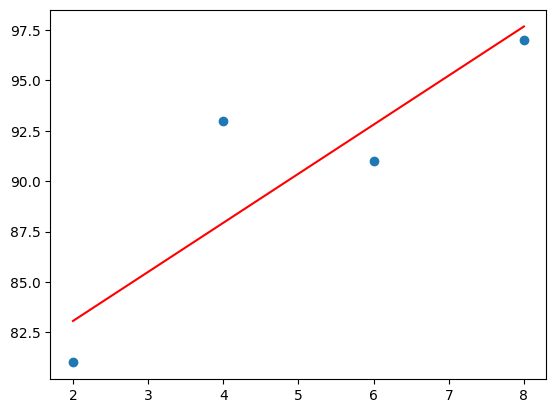

epoch=1500, 기울기=2.3978, 절편=78.4163


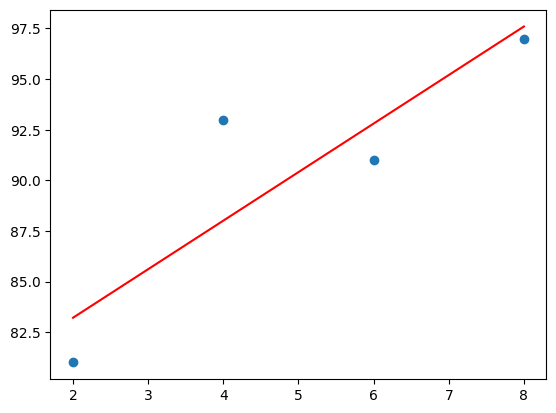

epoch=1600, 기울기=2.3707, 절편=78.5782


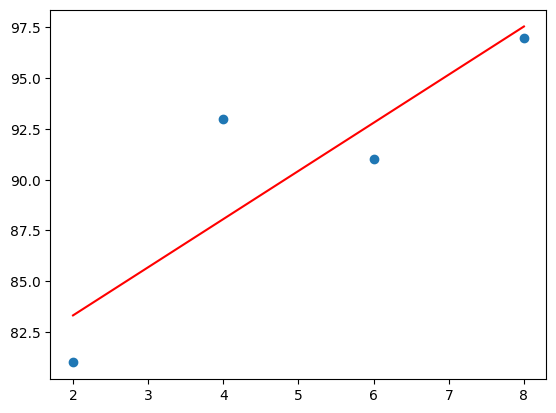

epoch=1700, 기울기=2.3511, 절편=78.6952


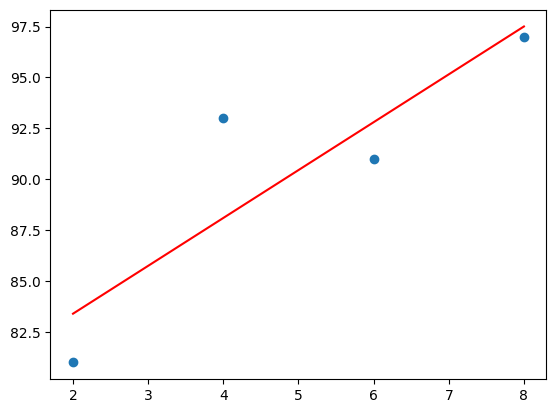

epoch=1800, 기울기=2.3369, 절편=78.7797


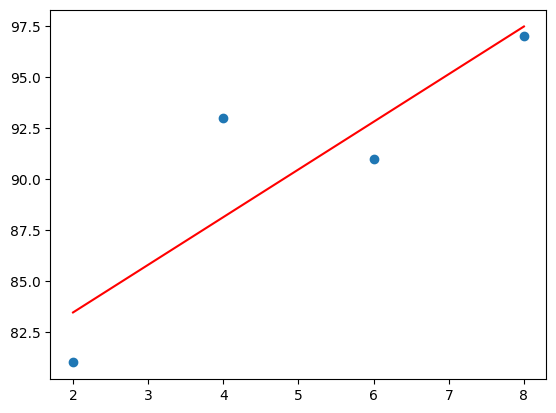

epoch=1900, 기울기=2.3267, 절편=78.8408


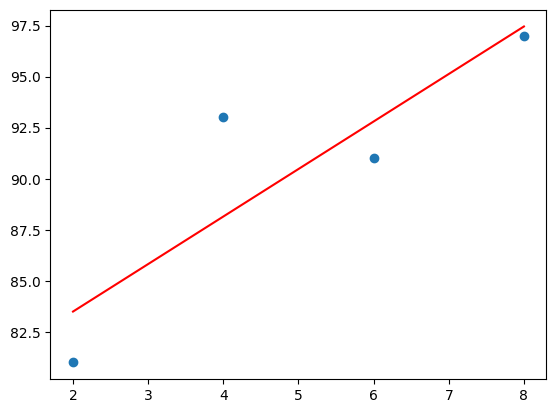

epoch=2000, 기울기=2.3193, 절편=78.8850


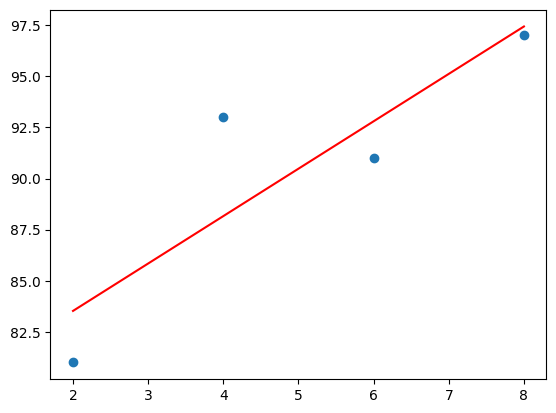

In [54]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        plt.scatter(x, y)
        plt.plot(x, y_pred,'r')
        plt.show()

In [50]:
print(a,b)

2.319277883209714 78.88495783757605


In [51]:
y_pred=a*x+b

In [55]:
x1 = np.array([2, 4, 6, 8]) # 독립 변수가 2개
x2 = np.array([0, 4, 2, 3]) # x1=공부시간  x2=과외시간
y = np.array([81, 93, 91, 97])

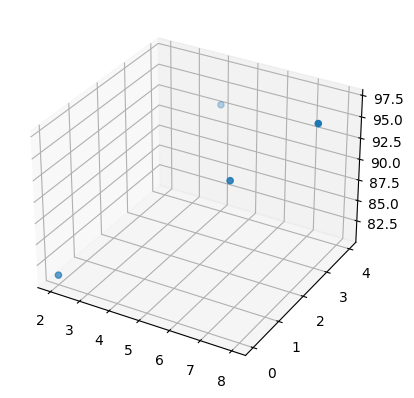

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [57]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다.
epochs = 2001

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [58]:
ypred=a1*x1+a2*x2+b

In [59]:
ypred

array([80.76417234, 92.97162951, 91.42521942, 96.75574296])

In [60]:
#선형회귀에서의 모델 찾기 과정은 위에 과정을 따름.
#선형회귀 모델을 딥러닝 프레임워크인 텐서플로우의 케라스를 활용하여 모델을 찾아보기
#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [62]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear')) #선형회귀모델은 activation함수를 linear로 해야함. 입력차원 1 출력 차원도 1로 함.

In [63]:
# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss='mse')

In [64]:
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 816ms/step - loss: 9417.4131
Epoch 2/2000
1/1 [==============================] - 0s 19ms/step - loss: 2211.1411
Epoch 3/2000
1/1 [==============================] - 0s 23ms/step - loss: 1147.4042
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 985.8871
Epoch 5/2000
1/1 [==============================] - 0s 17ms/step - loss: 956.9176
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 947.4502
Epoch 7/2000
1/1 [==============================] - 0s 23ms/step - loss: 940.8808
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 934.7706
Epoch 9/2000
1/1 [==============================] - 0s 22ms/step - loss: 928.7610
Epoch 10/2000
1/1 [==============================] - 0s 21ms/step - loss: 922.7996
Epoch 11/2000
1/1 [==============================] - 0s 19ms/step - loss: 916.8779
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 910.9949
Epoch 13/

1/1 [==============================] - 0s 147ms/step


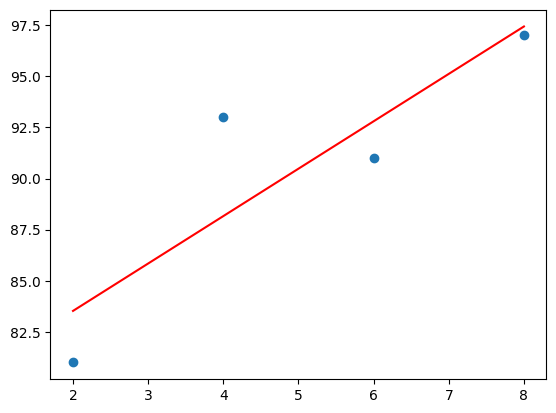

In [65]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [66]:
model.get_weights()

[array([[2.3192868]], dtype=float32), array([78.8849], dtype=float32)]

In [67]:
#x= [공부시간,과외시간]
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])


In [68]:
model=Sequential()

In [69]:
model.add(Dense(1,input_dim=2,activation='linear'))

In [70]:
model.compile(optimizer='sgd',loss='mse')

In [71]:
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 9087.9355
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 1497.3270
Epoch 3/2000
1/1 [==============================] - 0s 21ms/step - loss: 957.9719
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 914.5687
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 906.0841
Epoch 6/2000
1/1 [==============================] - 0s 18ms/step - loss: 900.0930
Epoch 7/2000
1/1 [==============================] - 0s 18ms/step - loss: 894.3151
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 888.5890
Epoch 9/2000
1/1 [==============================] - 0s 19ms/step - loss: 882.9033
Epoch 10/2000
1/1 [==============================] - 0s 18ms/step - loss: 877.2567
Epoch 11/2000
1/1 [==============================] - 0s 14ms/step - loss: 871.6488
Epoch 12/2000
1/1 [==============================] - 0s 14ms/step - loss: 866.0790
Epoch 13/2000

In [72]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 104ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


<ipython-input-72-951dca87f293>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))


In [73]:
#로지스틱 회귀모델

x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) #합격 :1 불합 :0

In [74]:
model=Sequential()

In [75]:
model.add(Dense(1,input_dim=1,activation='sigmoid'))

In [76]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [77]:
model.fit(x, y, epochs=5000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 7ms/step - loss: 0.2658
Epoch 2502/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2657
Epoch 2503/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2657
Epoch 2504/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2656
Epoch 2505/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.2656
Epoch 2506/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2655
Epoch 2507/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2655
Epoch 2508/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.2654
Epoch 2509/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2654
Epoch 2510/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2653
Epoch 2511/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2653
Epoch 2512/5000
1/1 [==============================] - 0s 8ms/step - los

1/1 [==============================] - 0s 257ms/step


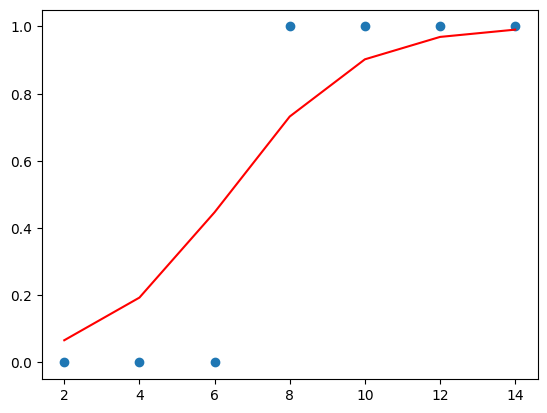

In [78]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [79]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 200ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.8%입니다


<ipython-input-79-5306a1178304>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))


In [125]:
train=np.loadtxt('/content/drive/MyDrive/멀티캠퍼스/data/data-01-test-score.csv',delimiter=',')
train

array([[ 80.,  79.,  77., 149.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [145]:
train_x=train[:,:3]
train_y=train[:,3]
train_x


array([[ 80.,  79.,  77.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [160]:
train_x.shape
train_y.shape

(25,)

In [161]:
model=Sequential()

In [162]:
model.add(Dense(1,input_dim=3,activation='linear'))

In [163]:
model.compile(optimizer='adam',loss= 'mse')

In [183]:
model.fit(train_x,train_y,epochs=2000)


Epoch 1/2000
1/1 [==============================] - 0s 15ms/step - loss: 62.6452
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 62.6425
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 62.6398
Epoch 4/2000
1/1 [==============================] - 0s 31ms/step - loss: 62.6372
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 62.6346
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 62.6320
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 62.6293
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 62.6267
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 62.6240
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 62.6214
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 62.6187
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 62.6161
Epoch 13/2000
1/1 [=======

In [187]:
import numpy as np
model.predict(np.array([[80,85,80]]))
print(model.predict(np.array([[90,90,90]]))[0][0],'점') #90 90 90일경우 몇점인지

1/1 [==============================] - 0s 34ms/step
183.58112 점


In [171]:
model1.add(Dense(1,input_dim=3,activation='linear'))

In [172]:
model1.compile(optimizer='sgd',loss='mse')

In [173]:
model1.fit(train_x,train_y,epochs=100)
#loss값이 발산 lr (학습률)이 커서

Epoch 1/100
1/1 [==============================] - 1s 741ms/step - loss: 49830.2461
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 7652661760.0000
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 1175538991366144.0000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 180576594541838073856.0000
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 27738687269972324254744576.0000
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 4260987197368639676944436166656.0000
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 654537760183893797996756610536439808.0000
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: inf
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: inf
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: inf
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: inf
Ep